In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

import dateutil.relativedelta
import seaborn as sns

In [2]:
raw_df = pd.read_csv('data/rosbank_train.csv')

In [202]:
# # Зачем rosbank_test.csv?
# raw_df_train = pd.read_csv('data/rosbank_train.csv')
# raw_df_test = pd.read_csv('data/rosbank_test.csv')
# raw_df = pd.concat([raw_df_train, raw_df_test], axis=0, sort=False)
# # raw_df.drop(['target_sum'], axis=1).head()
# len(raw_df)
# cl_ids_test = raw_df.cl_id.loc[raw_df.target_flag.isna()]
# cl_ids_test_set = set(cl_ids_test)
# len(cl_ids_test_set)

In [3]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [4]:
raw_df['DATE_'] = raw_df['TRDATETIME'].apply(lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')))

In [5]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  394439
Total transactions in test dataset:  96074


/home/darya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/darya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/darya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/darya/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


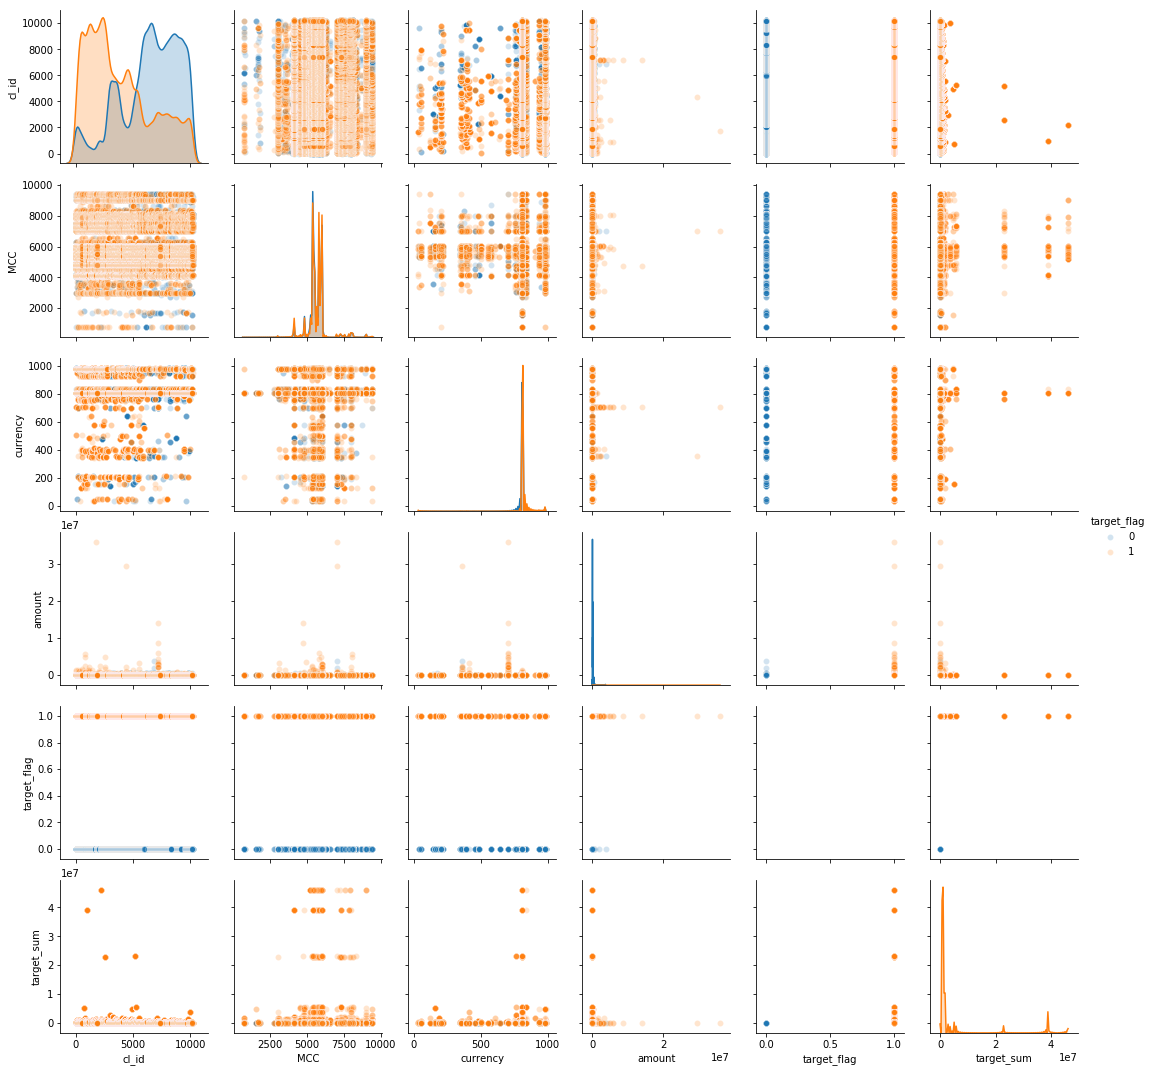

In [6]:
# graph = 
sns.pairplot(data=raw_df ,plot_kws={'alpha':0.2},hue='target_flag')
#graph.savefig("ros_bank.png")

### Предобработка

In [7]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w')
    ) 
    tmp_df = dataset.groupby(
        ['cl_id','day_of_transaction']
    )['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename(
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H')
    ) 
    return dataset.groupby(
        ['cl_id','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0).reset_index()

# transaction_by_day_count(raw_df)

In [8]:
testdf = transactions_train[transactions_train['cl_id']==10].groupby(['cl_id']).fillna(0).reset_index()

In [9]:
transactions_train[transactions_train['cl_id']==10].groupby(['cl_id','DATE_','MCC','trx_category']).agg(['count'])

PERIOD channel_type currency  \
                                             count        count    count   
cl_id DATE_               MCC  trx_category                                
10    2017-07-01 00:00:00 5411 POS               3            0        3   
                          5499 POS               1            0        1   
                          5541 POS               1            0        1   
      2017-07-01 06:51:38 6011 WD_ATM_ROS        1            0        1   
      2017-07-01 07:26:04 6011 WD_ATM_ROS        1            0        1   
      2017-07-01 08:38:14 5999 POS               1            0        1   
      2017-07-01 08:38:34 5999 POS               1            0        1   
      2017-07-02 00:00:00 5411 POS               1            0        1   
                          5655 POS               1            0        1   
                          5912 POS               1            0        1   
      2017-07-02 14:29:22 6011 WD_ATM_ROS        1            0        1   
      2017-07-03 00:00:00 5411 POS               1            0        1   
      2017-07-04 00:00:00 5411 POS               2            0        2   
                          5499 POS               2            0        2   
      2017-07-04 06:12:53 4829 C2C_OUT           1            0        1   
      2017-07-04 08:22:33 6012 CAT               1            0        1   
      2017-07-04 09:51:06 6011 WD_ATM_ROS        1            0        1   
      2017-07-05 00:00:00 5621 POS               1            0        1   
      2017-07-05 05:28:03 4829 C2C_OUT           1            0        1   
      2017-07-06 00:00:00 5411 POS               1            0        1   
                          5499 POS               1            0        1   
      2017-07-06 09:23:02 5999 POS               1            0        1   
      2017-07-07 00:00:00 5411 POS               2            0        2   
                          5912 POS               2            0        2   
      2017-07-07 05:44:10 5999 POS               1            0        1   
      2017-07-08 00:00:00 5211 POS               1            0        1   
                          5411 POS               1            0        1   
                          5921 POS               1            0        1   
      2017-07-08 07:05:36 5999 POS               1            0        1   
      2017-07-08 07:07:05 5999 POS               1            0        1   
...                                            ...          ...      ...   
      2017-09-17 00:00:00 5942 POS               1            0        1   
      2017-09-17 10:31:38 5999 POS               1            0        1   
      2017-09-18 09:39:24 6011 WD_ATM_ROS        1            0        1   
      2017-09-19 00:00:00 5541 POS               2            0        2   
                          5912 POS               3            0        3   
      2017-09-19 11:15:14 5999 POS               1            0        1   
      2017-09-19 11:15:34 5999 POS               1            0        1   
      2017-09-20 00:00:00 5311 POS               1            0        1   
                          5411 POS               3            0        3   
                          8099 POS               1            0        1   
      2017-09-21 00:00:00 5411 POS               1            0        1   
                          5499 POS               1            0        1   
      2017-09-22 03:59:18 5999 POS               1            0        1   
      2017-09-23 00:00:00 4812 POS               1            0        1   
                          5499 POS               1            0        1   
                          5533 POS               3            0        3   
                          5661 POS               1            0        1   
      2017-09-23 05:40:46 5999 POS               1            0        1   
      2017-09-24 00:00:00 5499 POS               1            0        1   
                

In [10]:
print(min(testdf['DATE_']))
print(max(testdf['DATE_']))
print(testdf['DATE_'].count())
# print(testdf[testdf['DATE_'] > max(testdf['DATE_']) - dateutil.relativedelta.relativedelta(months=12)]['DATE_'].count())
# print(testdf[testdf['DATE_'] > max(testdf['DATE_']) - dateutil.relativedelta.relativedelta(months=6)]['DATE_'].count())
print(testdf[testdf['DATE_'] > max(testdf['DATE_']) - dateutil.relativedelta.relativedelta(months=3)]['DATE_'].count())
print(testdf[testdf['DATE_'] > max(testdf['DATE_']) - dateutil.relativedelta.relativedelta(months=2)]['DATE_'].count())
print(testdf[testdf['DATE_'] > max(testdf['DATE_']) - dateutil.relativedelta.relativedelta(months=1)]['DATE_'].count())
print(testdf[testdf['DATE_'] > max(testdf['DATE_']) - dateutil.relativedelta.relativedelta(weeks=2)]['DATE_'].count())
print(testdf[testdf['DATE_'] > max(testdf['DATE_']) - dateutil.relativedelta.relativedelta(weeks=1)]['DATE_'].count())

2017-07-01 00:00:00
2017-09-28 05:14:47
463
463
345
135
53
22


In [11]:
set(list(raw_df.trx_category))

{'BACK_TRX',
 'C2C_IN',
 'C2C_OUT',
 'CASH_ADV',
 'CAT',
 'DEPOSIT',
 'POS',
 'WD_ATM_OTHER',
 'WD_ATM_PARTNER',
 'WD_ATM_ROS'}

In [12]:
type_for_gen = ['C2C_OUT','WD_ATM_ROS','DEPOSIT','WD_ATM_OTHER','WD_ATM_PARTNER']


In [13]:
def date_diff_df(cl_id_df):
    index=range(0,1)
    columns=['last2m','last1m','last2w','last1w' ,'diff2m_1m', 'diff2w_1w']
    ret_df = pd.DataFrame(index=index, columns=columns)
    counter = cl_id_df.shape[0]
#     ret_df['last12m'] = cl_id_df[cl_id_df['DATE_'] > max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=12)]['DATE_'].count()/365
#     ret_df['last6m'] = cl_id_df[cl_id_df['DATE_'] > max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=6)]['DATE_'].count()/183
    ret_df['last2m'] = cl_id_df[cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=2))]['DATE_'].count()/61
    ret_df['last1m'] = cl_id_df[cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=1))]['DATE_'].count()/30
    ret_df['last2w'] = cl_id_df[cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(weeks=2))]['DATE_'].count()/14
    ret_df['last1w'] = cl_id_df[cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(weeks=1))]['DATE_'].count()/7    
# разность за месяц и прошлоый месяяц
    ret_df['diff2m_1m'] = (ret_df['last2m']*61 -ret_df['last1m']*30)/30- ret_df['last1m']
    ret_df['diff2w_1w'] = (ret_df['last2w']*14 -ret_df['last1w']*7)/7- ret_df['last1w']


    for op_type in set(type_for_gen):
#         counter_2 = cl_id_df[op_type].shape[0]
#         ret_df['last12m'+ op_type] = cl_id_df[(cl_id_df['trx_category'] == op_type) & (cl_id_df['DATE_'] > max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=12))]['DATE_'].count()/365
#         ret_df['last6m'+ op_type] = cl_id_df[(cl_id_df['trx_category'] == op_type) & (cl_id_df['DATE_'] > max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=6))]['DATE_'].count()/183
        ret_df['last2m'+ op_type] = cl_id_df[(cl_id_df['trx_category'] == op_type) & (cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=2)))]['DATE_'].count()/61
        ret_df['last1m'+ op_type] = cl_id_df[(cl_id_df['trx_category'] == op_type) & (cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(months=1)))]['DATE_'].count()/30
        ret_df['last2w'+ op_type] = cl_id_df[(cl_id_df['trx_category'] == op_type) & (cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(weeks=2)))]['DATE_'].count()/14
        ret_df['last1w'+ op_type] = cl_id_df[(cl_id_df['trx_category'] == op_type) & (cl_id_df['DATE_'] > (max(cl_id_df['DATE_']) - dateutil.relativedelta.relativedelta(weeks=1)))]['DATE_'].count()/7
# разность за неделю в прошлом месяяце и в этом по статье
        ret_df['diff2m_1m'+ op_type] = (ret_df['last2m'+ op_type]*61 -ret_df['last1m'+ op_type]*30)/30- ret_df['last1m'+ op_type]
        ret_df['diff2w_1w'+ op_type] = (ret_df['last2w'+ op_type]*14 -ret_df['last1w'+ op_type]*7)/7- ret_df['last1w'+ op_type]
    return ret_df

In [14]:
date_diff_df(testdf)

last2m  last1m    last2w    last1w  diff2m_1m  diff2w_1w  last2mC2C_OUT  \
0  5.655738     4.5  3.785714  3.142857        2.5   1.285714       0.131148   

   last1mC2C_OUT  last2wC2C_OUT  last1wC2C_OUT        ...         \
0            0.0            0.0            0.0        ...          

   last2wWD_ATM_ROS  last1wWD_ATM_ROS  diff2m_1mWD_ATM_ROS  \
0          0.142857               0.0             0.333333   

   diff2w_1wWD_ATM_ROS  last2mDEPOSIT  last1mDEPOSIT  last2wDEPOSIT  \
0             0.285714       0.360656            0.1       0.071429   

   last1wDEPOSIT  diff2m_1mDEPOSIT  diff2w_1wDEPOSIT  
0            0.0          0.533333          0.142857  

[1 rows x 36 columns]

In [15]:
train_cl_stat = raw_df.groupby(['cl_id']).apply(date_diff_df)
train_cl_stat = train_cl_stat.reset_index().drop(['level_1'],axis=1).set_index('cl_id')

In [178]:
# train_cl_stat.head()

In [16]:
transaction_by_day = transaction_by_day_count(raw_df)
transaction_by_day = transaction_by_day.set_index('cl_id')

transaction_by_hour = transaction_by_hour_count(raw_df)
transaction_by_hour = transaction_by_hour.set_index('cl_id')

### Агрегирование с помощью Pandas и обучение базовой модели

In [17]:
def max_date(df):
    agg_df = df.groupby('cl_id')['PERIOD'].max()
    return agg_df

In [18]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [19]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [20]:
def max_date_of_transaction(df):
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [21]:
df_targets = raw_df[['cl_id', 'target_flag']].drop_duplicates().copy()
df_targets.index = df_targets['cl_id']
df_targets = df_targets.drop('cl_id', axis=1)
df_targets.head()

target_flag
cl_id             
0                0
1                0
5                1
9                0
10               0

In [22]:
# Топ MCC
raw_MCC1 =raw_df.groupby(['MCC'], as_index=False).agg({"amount": "count"})
raw_MCC1.columns = ['MCC', 'amount_count']
temp_raw_MCC = raw_MCC1.sort_values(by='amount_count', ascending=False).head(20)
top_MCC = temp_raw_MCC.MCC.values
top_MCC

array([5411, 6011, 5814, 5812, 5499, 5541, 5912, 5999, 6012, 5921, 5331,
       4121, 5211, 4829, 5691, 5261, 4111, 5977, 5200, 5732])

In [23]:
transactions_train.loc[~transactions_train.MCC.isin(top_MCC) , 'MCC'] = 'MCC_other'

In [24]:
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)


df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

df_train_1 = pd.merge(
    df_train_mcc,
    df_train_trx_category,
    left_index=True,
    right_index=True,
)

df_time_train = pd.merge(
    transaction_by_day,
    transaction_by_hour,
    left_index=True,
    right_index=True,)

df_train = pd.merge(
    df_time_train,
    df_train_1,
    left_index=True,
    right_index=True,)

df_train = pd.merge(
    train_cl_stat,
    df_train,
    left_index=True,
    right_index=True,)

# df_train = pd.merge(
#     pd.DataFrame(max_date(transactions_train)),
#     df_train,
#     left_index=True,
#     right_index=True,)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder().fit(df_train['PERIOD'])
# df_train['PERIOD'] = le.transform(df_train['PERIOD'])
# df_train = get_one_hot(df_train, ['PERIOD'])
# df_train = df_train.drop(['PERIOD'], axis = 1)


df_train = pd.merge(
    df_train,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner'
)

### test data

In [25]:
transactions_test.loc[~transactions_test.MCC.isin(top_MCC) , 'MCC'] = 'MCC_other'

In [26]:
df_test_mcc = pd.merge(
    get_aggregated_df(transactions_test, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_test, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)

df_test_trx_category = pd.merge(
    get_aggregated_df(transactions_test, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_test, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

df_test_1 = pd.merge(
    df_test_mcc,
    df_test_trx_category,
    left_index=True,
    right_index=True,
)

df_time_test = pd.merge(
    transaction_by_day,
    transaction_by_hour,
    left_index=True,
    right_index=True,)
    
df_test = pd.merge(
    df_time_test,
    df_test_1,
    left_index=True,
    right_index=True,)

df_test = pd.merge(
    train_cl_stat,
    df_test,
    left_index=True,
    right_index=True,)

# df_test = pd.merge(
#     pd.DataFrame(max_date(transactions_test)),
#     df_test,
#     left_index=True,
#     right_index=True,)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder().fit(df_test['PERIOD'])
# df_test['PERIOD'] = le.transform(df_test['PERIOD'])
# df_test = get_one_hot(df_test, ['PERIOD'])
# df_test = df_test.drop(['PERIOD'], axis = 1)


df_test = pd.merge(
    df_test,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner'
)

In [27]:
list(df_test.columns)

['last2m',
 'last1m',
 'last2w',
 'last1w',
 'diff2m_1m',
 'diff2w_1w',
 'last2mC2C_OUT',
 'last1mC2C_OUT',
 'last2wC2C_OUT',
 'last1wC2C_OUT',
 'diff2m_1mC2C_OUT',
 'diff2w_1wC2C_OUT',
 'last2mWD_ATM_OTHER',
 'last1mWD_ATM_OTHER',
 'last2wWD_ATM_OTHER',
 'last1wWD_ATM_OTHER',
 'diff2m_1mWD_ATM_OTHER',
 'diff2w_1wWD_ATM_OTHER',
 'last2mWD_ATM_PARTNER',
 'last1mWD_ATM_PARTNER',
 'last2wWD_ATM_PARTNER',
 'last1wWD_ATM_PARTNER',
 'diff2m_1mWD_ATM_PARTNER',
 'diff2w_1wWD_ATM_PARTNER',
 'last2mWD_ATM_ROS',
 'last1mWD_ATM_ROS',
 'last2wWD_ATM_ROS',
 'last1wWD_ATM_ROS',
 'diff2m_1mWD_ATM_ROS',
 'diff2w_1wWD_ATM_ROS',
 'last2mDEPOSIT',
 'last1mDEPOSIT',
 'last2wDEPOSIT',
 'last1wDEPOSIT',
 'diff2m_1mDEPOSIT',
 'diff2w_1wDEPOSIT',
 'day_0',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 'MCC_mean_4111',
 'MCC_mean_4

In [28]:
df_test.shape

(1000, 130)

### train test split

In [29]:
X_test = df_test.drop(['target_flag'], axis=1)
y_test = df_test['target_flag']

In [30]:
X_train = df_train.drop(['target_flag'], axis=1)
y_train = df_train['target_flag']

### random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
cols = list(filter(lambda x: x in X_test.columns, X_train.columns))

In [33]:
len(cols)

129

In [34]:
clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0)\
.fit(X_train[cols], y_train)

In [35]:
y_train_predict = clf.predict_proba(X_train[cols])[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.98


In [36]:
y_test_predict = clf.predict_proba(X_test[cols])[:, 1]


roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Test: ", roc_auc_test)

Test:  0.8


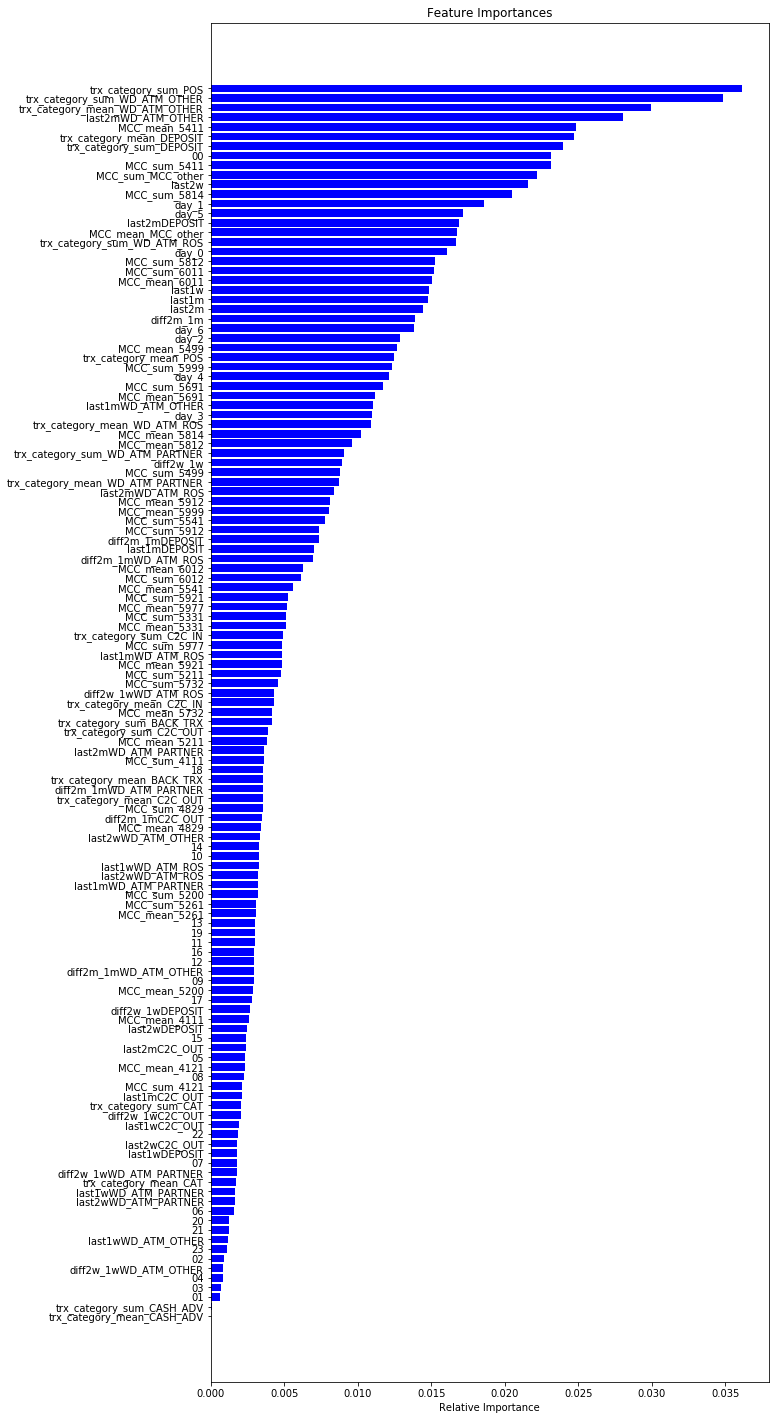

In [47]:
features = X_train.columns
importances = clf.feature_importances_#[0:30] - показывает не отсртированные по ценности первые 30

indices = np.argsort(importances)
plt.figure(figsize=(10,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

['trx_category_sum_POS',
 'trx_category_sum_WD_ATM_OTHER',
 'trx_category_mean_WD_ATM_OTHER',
 'last2mWD_ATM_OTHER',
 'MCC_mean_5411',
 'trx_category_mean_DEPOSIT',
 'trx_category_sum_DEPOSIT',
 '00',
 'MCC_sum_5411',
 'MCC_sum_MCC_other']

In [88]:
len(importances[indices]) 

129

In [48]:
importances_p = clf.feature_importances_#[0:20]
indices_p = np.argsort(importances_p)

In [50]:
list_feat = [features[i] for i in indices_p][::-1]

In [51]:
len(list_feat)

129

In [114]:
from tqdm import tqdm_notebook as tqdm

In [119]:
roc_auc_df = pd.DataFrame(columns=['num','name_feat', 'roc_auc_train', 'roc_auc_test'])
for i in tqdm(list(range(10, len(list_feat)))):
    cols = list_feat[:i]
    clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0).fit(X_train[cols], y_train)
    
    y_train_predict = clf.predict_proba(X_train[cols])[:, 1]   
    roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 4)   
    
    y_test_predict = clf.predict_proba(X_test[cols])[:, 1]
    roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 4)
    
    roc_auc_df = roc_auc_df.append({'num': i, 'name_feat': list_feat[i], 'roc_auc_train': roc_auc_train,'roc_auc_test': roc_auc_test}, ignore_index=True)

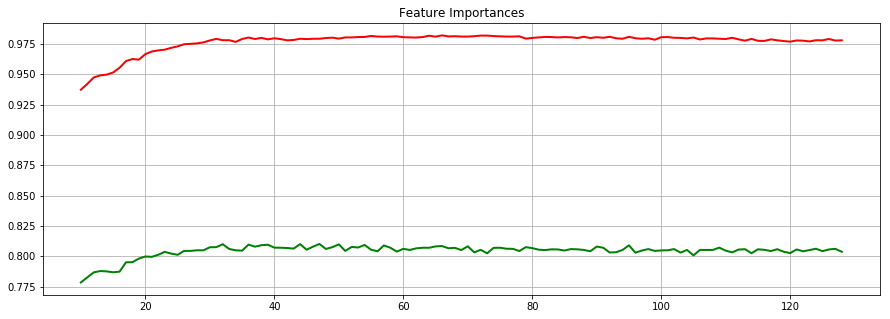

In [120]:
plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.plot(roc_auc_df.num, roc_auc_df.roc_auc_train, 'r', linewidth=2 )
plt.plot(roc_auc_df.num, roc_auc_df.roc_auc_test, 'g', linewidth=2)
plt.grid()

In [121]:
roc_auc_df.head(30)

num                        name_feat  roc_auc_train  roc_auc_test
0   10                           last2w         0.9373        0.7784
1   11                     MCC_sum_5814         0.9421        0.7826
2   12                            day_1         0.9474        0.7867
3   13                            day_5         0.9491        0.7878
4   14                    last2mDEPOSIT         0.9497        0.7875
5   15               MCC_mean_MCC_other         0.9515        0.7868
6   16      trx_category_sum_WD_ATM_ROS         0.9554        0.7873
7   17                            day_0         0.9609        0.7950
8   18                     MCC_sum_5812         0.9626        0.7951
9   19                     MCC_sum_6011         0.9621        0.7981
10  20                    MCC_mean_6011         0.9666        0.7998
11  21                           last1w         0.9688        0.7995
12  22                           last1m         0.9697        0.8012
13  23                           last2m         0.9703        0.8036
14  24                        diff2m_1m         0.9718        0.8022
15  25                            day_6         0.9730        0.8012
16  26                            day_2         0.9748        0.8044
17  27                    MCC_mean_5499         0.9751        0.8044
18  28            trx_category_mean_POS         0.9755        0.8049
19  29                     MCC_sum_5999         0.9763        0.8049
20  30                            day_4         0.9779        0.8074
21  31                     MCC_sum_5691         0.9792        0.8075
22  32                    MCC_mean_5691         0.9781        0.8099
23  33               last1mWD_ATM_OTHER         0.9781        0.8060
24  34                            day_3         0.9767        0.8049
25  35     trx_category_mean_WD_ATM_ROS         0.9791        0.8046
26  36                    MCC_mean_5814         0.9803        0.8096
27  37                    MCC_mean_5812         0.9791        0.8079
28  38  trx_category_sum_WD_ATM_PARTNER         0.9800        0.8091
29  39                        diff2w_1w         0.9788        0.8095

In [148]:
roc_auc_df = pd.DataFrame(columns=['num','name_feat', 'roc_auc_train', 'roc_auc_test'])
for i in range(2, 83):
    cols = list_feat[:i]
    clf = RandomForestClassifier(n_estimators=400, max_depth=9, random_state=0).fit(X_train[cols], y_train)
    
    y_train_predict = clf.predict_proba(X_train[cols])[:, 1]

    roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
    
    y_test_predict = clf.predict_proba(X_test[cols])[:, 1]

    roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
    roc_auc_df = roc_auc_df.append({'num': i,'name_feat': list_feat[i], 'roc_auc_train': roc_auc_train,'roc_auc_test': roc_auc_test}, ignore_index=True)

In [146]:
roc_auc_df = pd.DataFrame(columns=['num','name_feat', 'roc_auc_train', 'roc_auc_test'])
for i in tqdm(range(25, 50)):
    cols = list_feat[:i]
    clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0).fit(X_train[cols], y_train)
    
    y_train_predict = clf.predict_proba(X_train[cols])[:, 1]

    roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 4)
    
    y_test_predict = clf.predict_proba(X_test[cols])[:, 1]

    roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 4)
    roc_auc_df = roc_auc_df.append({'num': i, 'name_feat': list_feat[i], 'roc_auc_train': roc_auc_train,'roc_auc_test': roc_auc_test}, ignore_index=True)

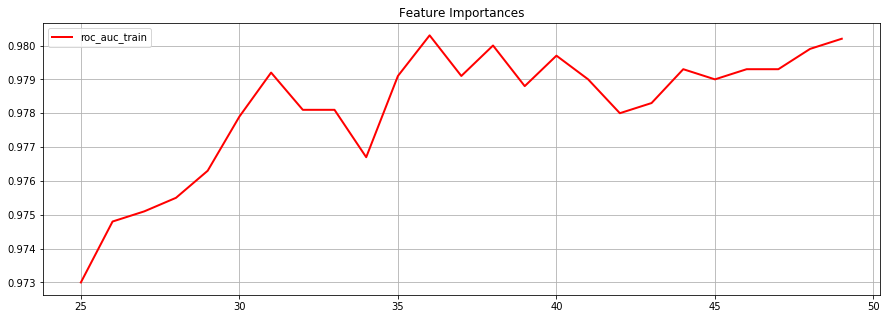

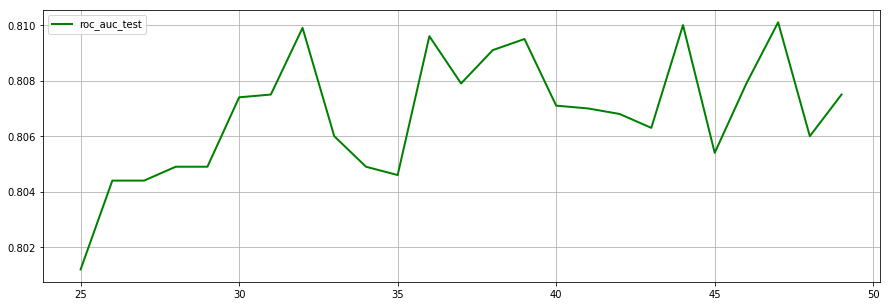

In [147]:
plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.plot(roc_auc_df.num, roc_auc_df.roc_auc_train, 'r', linewidth=2, label='roc_auc_train' )
plt.legend(loc='best')
plt.grid()
plt.show()
plt.figure(figsize=(15,5))
plt.plot(roc_auc_df.num, roc_auc_df.roc_auc_test, 'g', linewidth=2 , label='roc_auc_test')
plt.legend(loc='best')
plt.grid()

In [148]:
roc_auc_df

num                         name_feat  roc_auc_train  roc_auc_test
0   25                             day_6         0.9730        0.8012
1   26                             day_2         0.9748        0.8044
2   27                     MCC_mean_5499         0.9751        0.8044
3   28             trx_category_mean_POS         0.9755        0.8049
4   29                      MCC_sum_5999         0.9763        0.8049
5   30                             day_4         0.9779        0.8074
6   31                      MCC_sum_5691         0.9792        0.8075
7   32                     MCC_mean_5691         0.9781        0.8099
8   33                last1mWD_ATM_OTHER         0.9781        0.8060
9   34                             day_3         0.9767        0.8049
10  35      trx_category_mean_WD_ATM_ROS         0.9791        0.8046
11  36                     MCC_mean_5814         0.9803        0.8096
12  37                     MCC_mean_5812         0.9791        0.8079
13  38   trx_category_sum_WD_ATM_PARTNER         0.9800        0.8091
14  39                         diff2w_1w         0.9788        0.8095
15  40                      MCC_sum_5499         0.9797        0.8071
16  41  trx_category_mean_WD_ATM_PARTNER         0.9790        0.8070
17  42                  last2mWD_ATM_ROS         0.9780        0.8068
18  43                     MCC_mean_5912         0.9783        0.8063
19  44                     MCC_mean_5999         0.9793        0.8100
20  45                      MCC_sum_5541         0.9790        0.8054
21  46                      MCC_sum_5912         0.9793        0.8079
22  47                  diff2m_1mDEPOSIT         0.9793        0.8101
23  48                     last1mDEPOSIT         0.9799        0.8060
24  49               diff2m_1mWD_ATM_ROS         0.9802        0.8075

In [149]:
all_feat = [features[i] for i in indices][::-1]
top_feat = all_feat[:45]
top_feat

['trx_category_sum_POS',
 'trx_category_sum_WD_ATM_OTHER',
 'trx_category_mean_WD_ATM_OTHER',
 'last2mWD_ATM_OTHER',
 'MCC_mean_5411',
 'trx_category_mean_DEPOSIT',
 'trx_category_sum_DEPOSIT',
 '00',
 'MCC_sum_5411',
 'MCC_sum_MCC_other',
 'last2w',
 'MCC_sum_5814',
 'day_1',
 'day_5',
 'last2mDEPOSIT',
 'MCC_mean_MCC_other',
 'trx_category_sum_WD_ATM_ROS',
 'day_0',
 'MCC_sum_5812',
 'MCC_sum_6011',
 'MCC_mean_6011',
 'last1w',
 'last1m',
 'last2m',
 'diff2m_1m',
 'day_6',
 'day_2',
 'MCC_mean_5499',
 'trx_category_mean_POS',
 'MCC_sum_5999',
 'day_4',
 'MCC_sum_5691',
 'MCC_mean_5691',
 'last1mWD_ATM_OTHER',
 'day_3',
 'trx_category_mean_WD_ATM_ROS',
 'MCC_mean_5814',
 'MCC_mean_5812',
 'trx_category_sum_WD_ATM_PARTNER',
 'diff2w_1w',
 'MCC_sum_5499',
 'trx_category_mean_WD_ATM_PARTNER',
 'last2mWD_ATM_ROS',
 'MCC_mean_5912',
 'MCC_mean_5999']

/home/darya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/darya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/darya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/darya/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


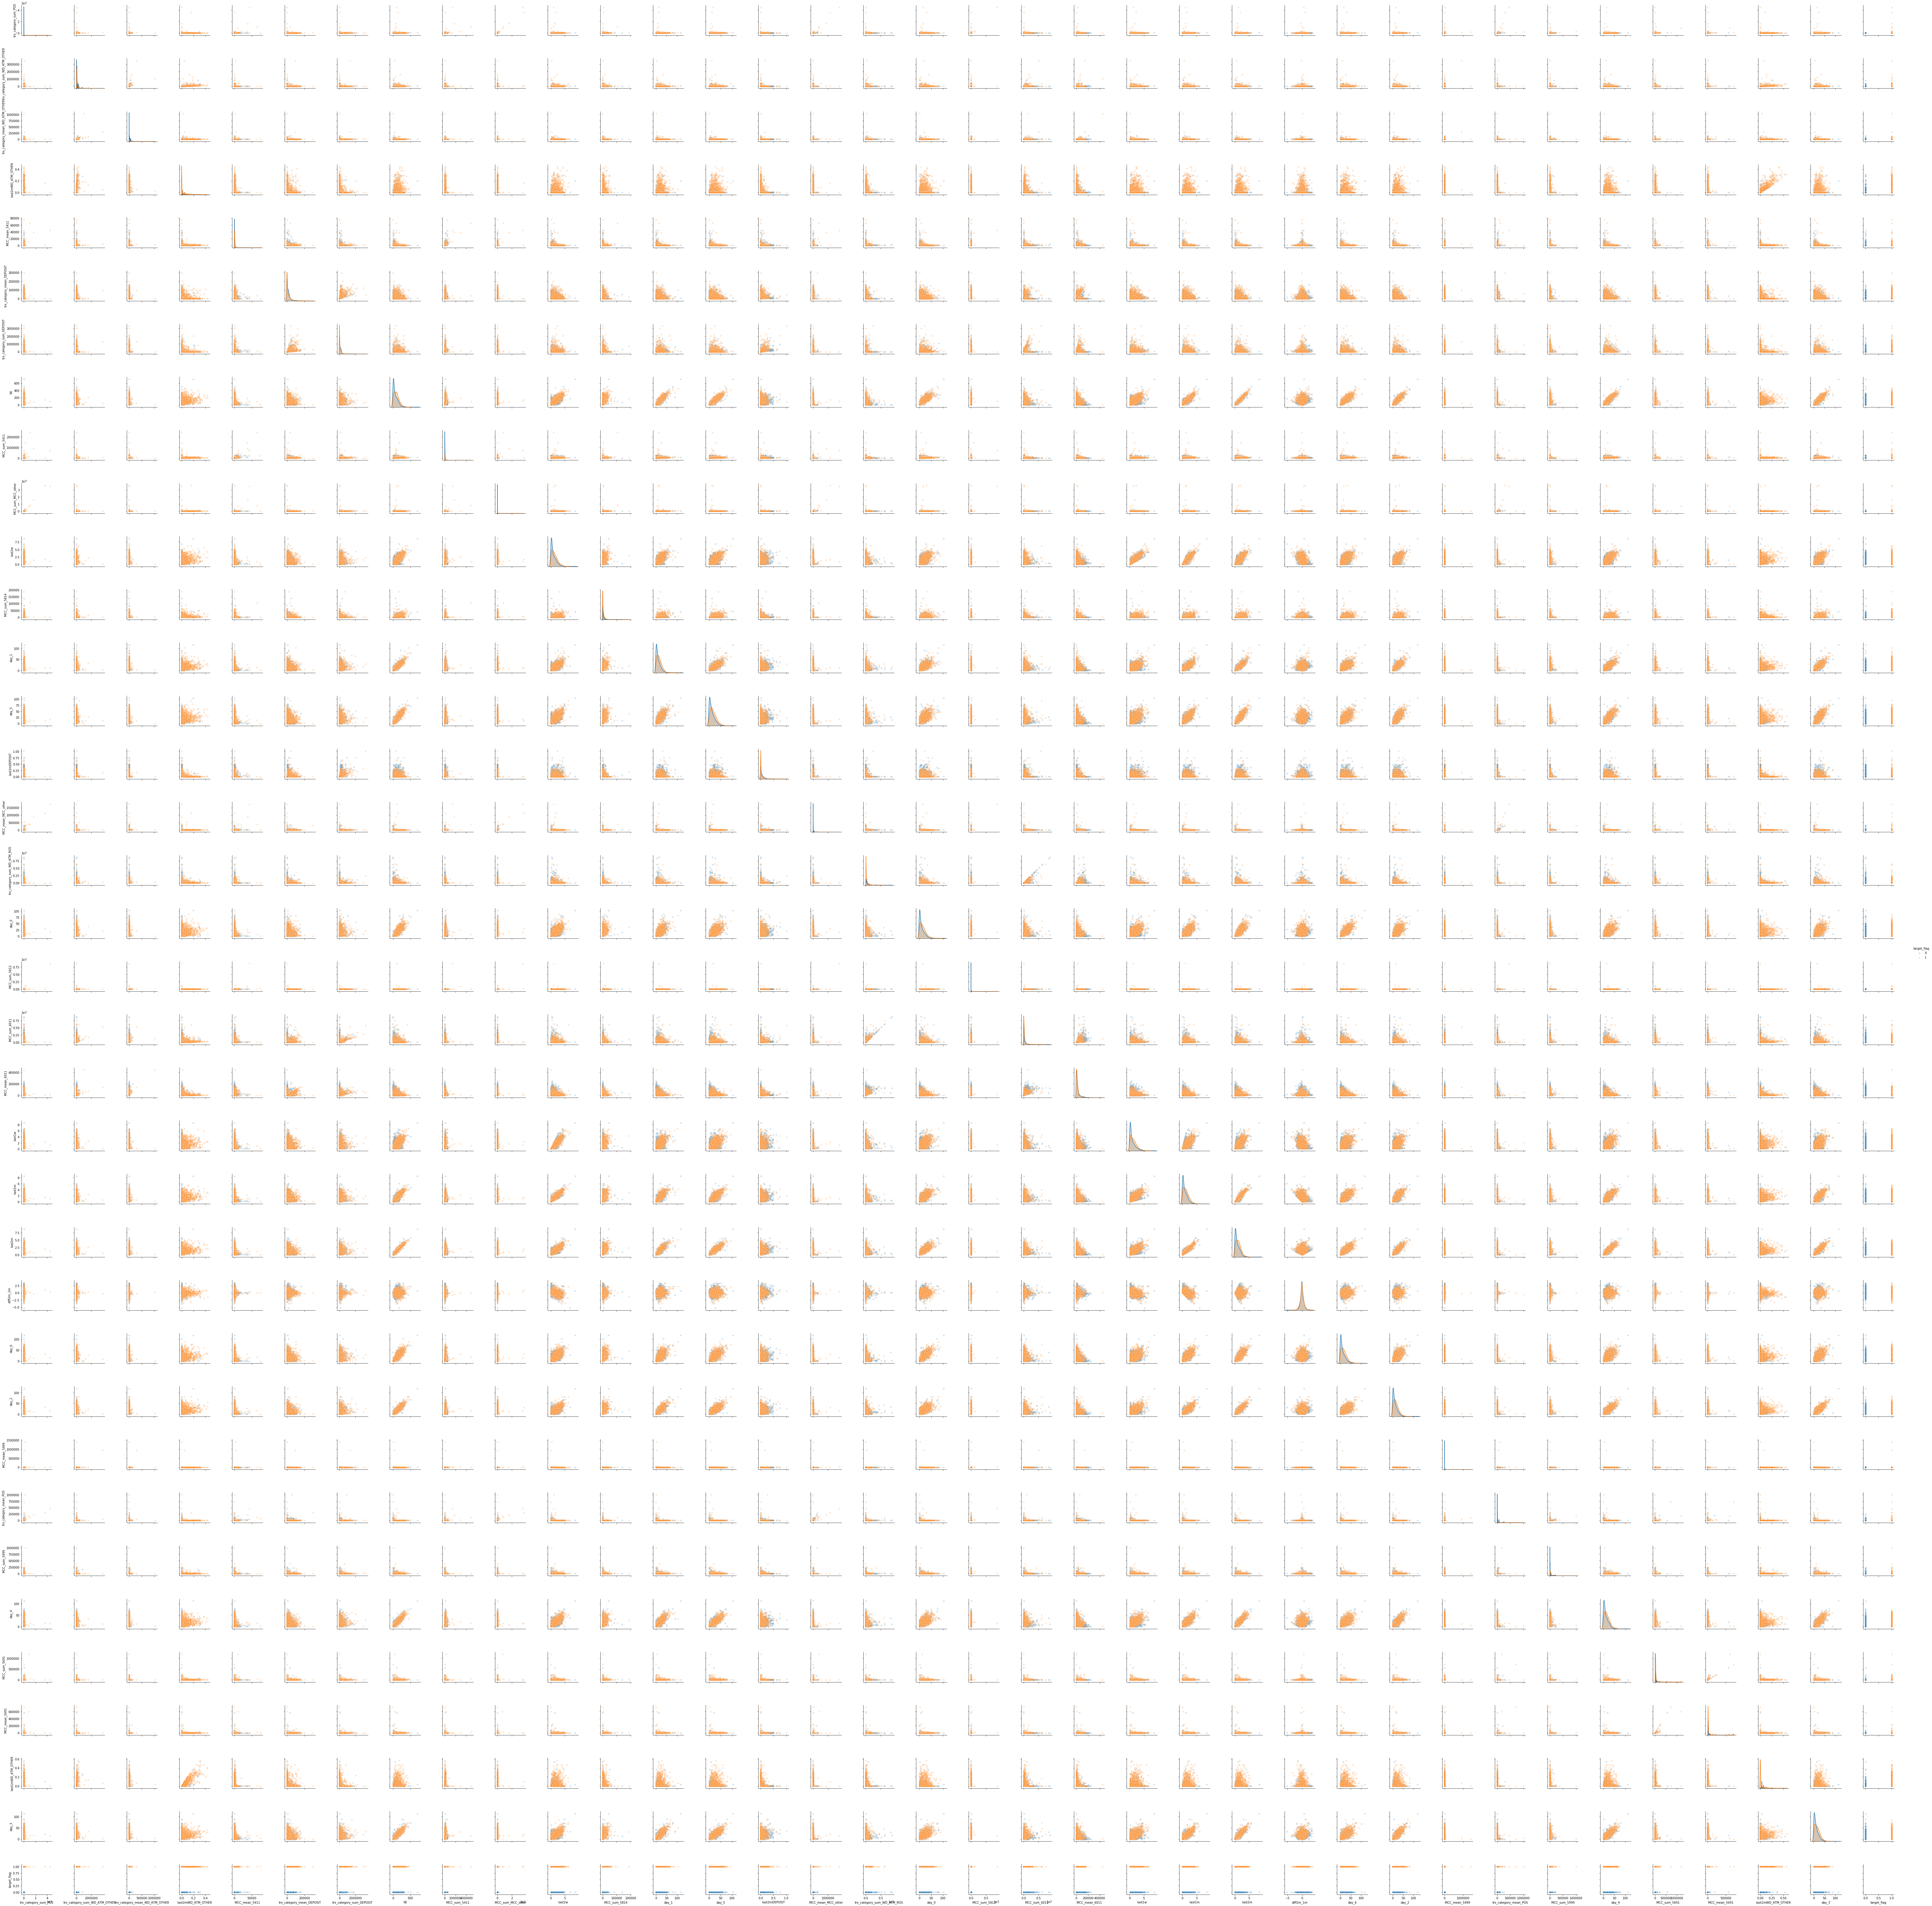

In [131]:
sns.pairplot(data=df_train[top_feat+['target_flag']],plot_kws={'alpha':0.2},hue='target_flag');